In [7]:
import pandas as pd
import numpy as np

In [8]:
train = pd.read_csv("G:/Loan prediction dataset - Capstone 3/train.csv")
test = pd.read_csv("G:/Loan prediction dataset - Capstone 3/test.csv")

In [9]:
train['G:\Loan prediction dataset - Capstone 3\train.csv'] = 'train'
test['G:\Loan prediction dataset - Capstone 3\test.csv'] = 'test'

In [10]:
df = pd.concat([train,test],ignore_index = 'True')

C:\Users\Balamre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
df.isna().sum()

ApplicantIncome                                        0
CoapplicantIncome                                      0
Credit_History                                        79
Dependents                                            25
Education                                              0
G:\Loan prediction dataset - Capstone 3\test.csv     614
G:\Loan prediction dataset - Capstone 3\train.csv    367
Gender                                                24
LoanAmount                                            27
Loan_Amount_Term                                      20
Loan_ID                                                0
Loan_Status                                          367
Married                                                3
Property_Area                                          0
Self_Employed                                         55
dtype: int64

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
ApplicantIncome                                     981 non-null int64
CoapplicantIncome                                   981 non-null float64
Credit_History                                      902 non-null float64
Dependents                                          956 non-null object
Education                                           981 non-null object
G:\Loan prediction dataset - Capstone 3	est.csv     367 non-null object
G:\Loan prediction dataset - Capstone 3	rain.csv    614 non-null object
Gender                                              957 non-null object
LoanAmount                                          954 non-null float64
Loan_Amount_Term                                    961 non-null float64
Loan_ID                                             981 non-null object
Loan_Status                                         614 non-null object
Married                     

In [14]:
df.apply(lambda x : len(x.unique()))

ApplicantIncome                                      752
CoapplicantIncome                                    437
Credit_History                                         3
Dependents                                             5
Education                                              2
G:\Loan prediction dataset - Capstone 3\test.csv       2
G:\Loan prediction dataset - Capstone 3\train.csv      2
Gender                                                 3
LoanAmount                                           233
Loan_Amount_Term                                      13
Loan_ID                                              981
Loan_Status                                            3
Married                                                3
Property_Area                                          3
Self_Employed                                          3
dtype: int64

In [15]:
categorical_Columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_Columns = [x for x in df.dtypes.index if x not in ['G:\Loan prediction dataset - Capstone 3\test.csv','G:\Loan prediction dataset - Capstone 3\train.csv','Loan_ID']]

In [16]:
categorical_Columns

['ApplicantIncome',
 'CoapplicantIncome',
 'Credit_History',
 'Dependents',
 'Education',
 'Gender',
 'LoanAmount',
 'Loan_Amount_Term',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed']

In [17]:
for col in categorical_Columns:
    print(df[col].value_counts())

2500     13
5000     11
3333     10
3500      9
2600      8
         ..
14999     1
4758      1
4755      1
4364      1
3691      1
Name: ApplicantIncome, Length: 752, dtype: int64
0.0       429
2500.0      6
2083.0      5
2000.0      5
2333.0      5
         ... 
1131.0      1
4700.0      1
2374.0      1
5302.0      1
3422.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64
1.0    754
0.0    148
Name: Credit_History, dtype: int64
0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64
Graduate        763
Not Graduate    218
Name: Education, dtype: int64
Male      775
Female    182
Name: Gender, dtype: int64
120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
         ..
196.0     1
400.0     1
250.0     1
500.0     1
156.0     1
Name: LoanAmount, Length: 232, dtype: int64
360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype

In [18]:
df.isna().sum()

ApplicantIncome                                        0
CoapplicantIncome                                      0
Credit_History                                        79
Dependents                                            25
Education                                              0
G:\Loan prediction dataset - Capstone 3\test.csv     614
G:\Loan prediction dataset - Capstone 3\train.csv    367
Gender                                                24
LoanAmount                                            27
Loan_Amount_Term                                      20
Loan_ID                                                0
Loan_Status                                          367
Married                                                3
Property_Area                                          0
Self_Employed                                         55
dtype: int64

In [19]:
df

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,G:\Loan prediction dataset - Capstone 3\test.csv,G:\Loan prediction dataset - Capstone 3\train.csv,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,NaN,train,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,NaN,train,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,NaN,train,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,NaN,train,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,NaN,train,Male,141.0,360.0,LP001008,Y,No,Urban,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,4009,1777.0,1.0,3+,Not Graduate,test,NaN,Male,113.0,360.0,LP002971,NaN,Yes,Urban,Yes
977,4158,709.0,1.0,0,Graduate,test,NaN,Male,115.0,360.0,LP002975,NaN,Yes,Urban,No
978,3250,1993.0,NaN,0,Graduate,test,NaN,Male,126.0,360.0,LP002980,NaN,No,Semiurban,No
979,5000,2393.0,1.0,0,Graduate,test,NaN,Male,158.0,360.0,LP002986,NaN,Yes,Rural,No


In [20]:
import seaborn as sns

C:\Users\Balamre\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Balamre\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


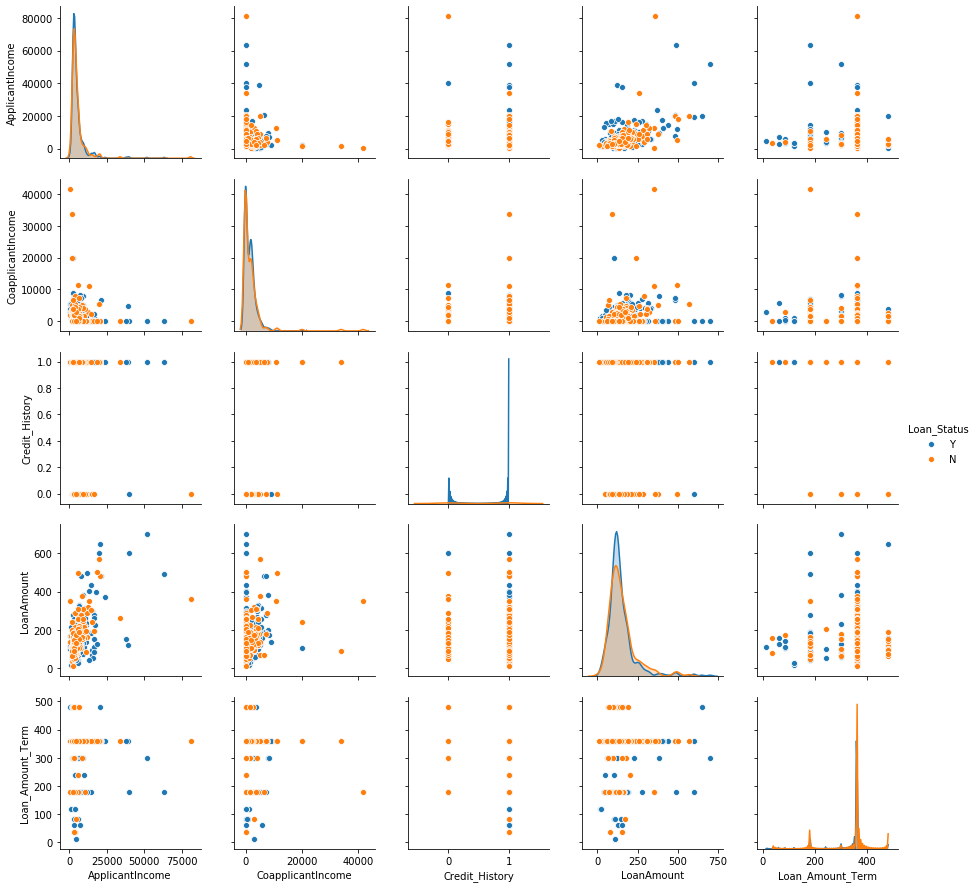

In [21]:
sns.pairplot(df,hue = 'Loan_Status', dropna = True)

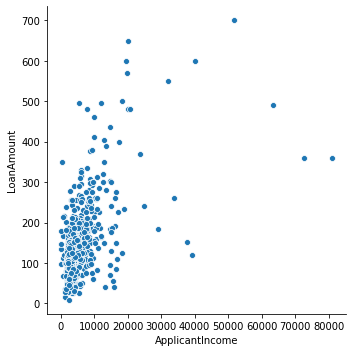

In [22]:
sns.relplot(x = 'ApplicantIncome', y ='LoanAmount', data = df)

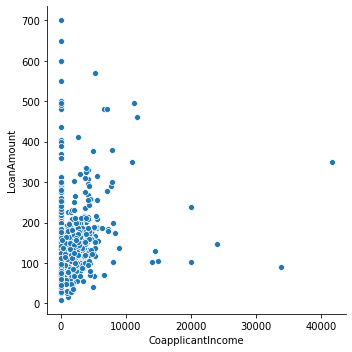

In [23]:
sns.relplot(x = 'CoapplicantIncome', y ='LoanAmount', data = df)

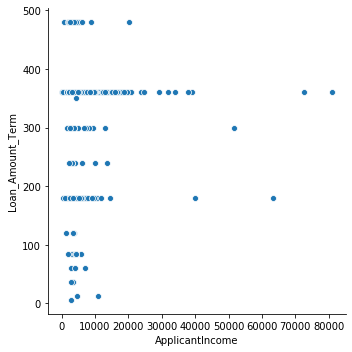

In [24]:
sns.relplot(x = 'ApplicantIncome', y ='Loan_Amount_Term', data = df)

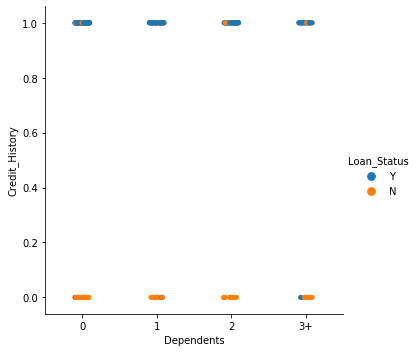

In [25]:
sns.catplot(x = 'Dependents', y = 'Credit_History', data = df, hue = 'Loan_Status')

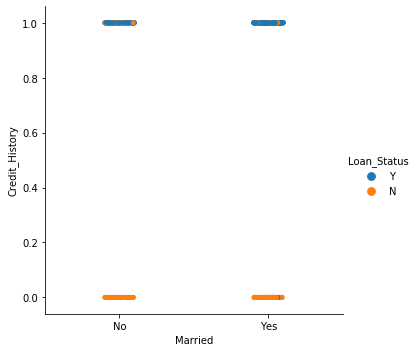

In [26]:
sns.catplot(x = 'Married', y = 'Credit_History', data = df, hue = 'Loan_Status')

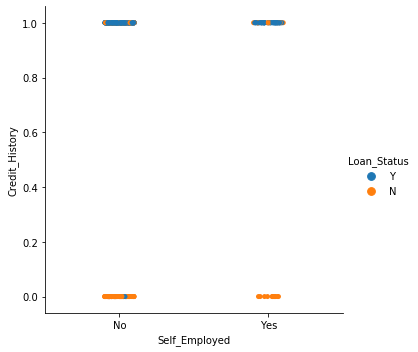

In [27]:
sns.catplot(x = 'Self_Employed', y = 'Credit_History', data = df, hue = 'Loan_Status')

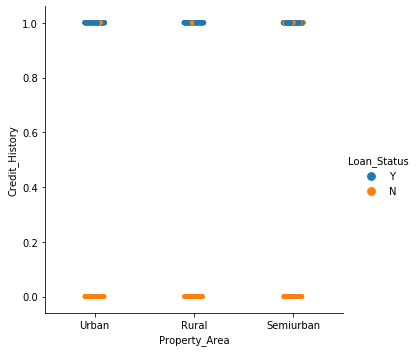

In [28]:
sns.catplot(x = 'Property_Area', y = 'Credit_History', data = df, hue = 'Loan_Status')

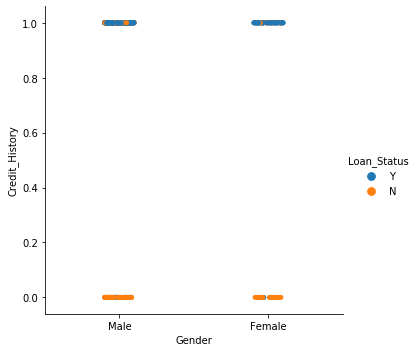

In [29]:
sns.catplot(x = 'Gender', y = 'Credit_History', data = df, hue = 'Loan_Status')

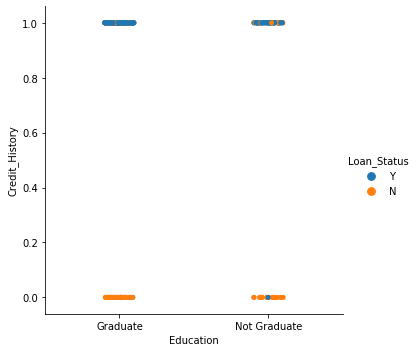

In [30]:
sns.catplot(x = 'Education', y = 'Credit_History', data = df, hue = 'Loan_Status')

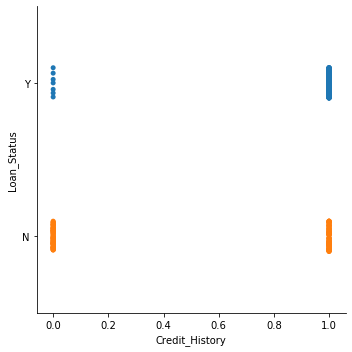

In [31]:
sns.catplot(x = 'Credit_History', y = 'Loan_Status', data = df)

In [32]:
# Credit_HIstory is an important feature in predicting loan_StautusTherefore imputing it with 0 or 1 may affect the aggregation of the other values present. 
#Therefore we create a new value for Nan's and can analyse how other features work on it.
df['Credit_History'].fillna(2,inplace = True)

In [33]:
#categorical and it is about 2.5% of the data. so used mode for imputing. 
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)

In [34]:
df['Dependents'].mode()

0    0
dtype: object

In [35]:
# Gender - 24 missing so applyting mode - moreover the data is in iteself skewd
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [36]:
df['Gender'].mode()

0    Male
dtype: object

In [37]:
#Loanamount
LoanAmount_mean = df.pivot_table(values = 'LoanAmount', index = 'Credit_History')

In [38]:
miss_Bool = df['LoanAmount'].isnull()

In [39]:
df.loc[miss_Bool,'LoanAmount'] = df.loc[miss_Bool,'Credit_History'].apply(lambda x : LoanAmount_mean.at[x,'LoanAmount'])

In [40]:
df.LoanAmount.describe()

count    981.000000
mean     142.501884
std       76.348369
min        9.000000
25%      101.000000
50%      128.000000
75%      160.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [41]:
#LoanAmount_mean_1 = df.pivot_table(values = 'LoanAmount', index = ['Gender','Dependents'])

In [42]:
#LoanAmount=df.set_index(['Gender', 'Dependents']).LoanAmount.fillna(LoanAmount_mean_1.LoanAmount).reset_index()

In [43]:
#df.LoanAmount.describe()

In [44]:
#Loan_Amount_Term
Loan_Term_Avg = df.pivot_table(values = 'Loan_Amount_Term', index = 'Credit_History')

In [45]:
miss_Bool = df['Loan_Amount_Term'].isnull()

In [46]:
df.loc[miss_Bool,'Loan_Amount_Term'] = df.loc[miss_Bool,'Credit_History'].apply(lambda x : Loan_Term_Avg.at[x,'Loan_Amount_Term'])

In [47]:
df.Loan_Amount_Term.describe()

count    981.000000
mean     342.215695
std       64.433426
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [48]:
#Married
df.Married.fillna(df['Married'].mode()[0], inplace = True)

In [49]:
df['Married'].mode()

0    Yes
dtype: object

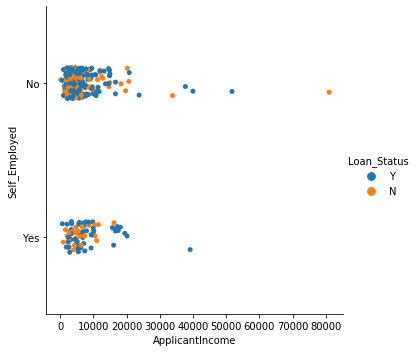

In [50]:
sns.catplot(x = 'ApplicantIncome', y='Self_Employed', data = df, hue = 'Loan_Status')

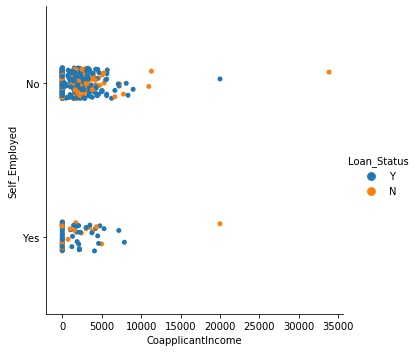

In [51]:
sns.catplot(x = 'CoapplicantIncome', y='Self_Employed', data = df, hue = 'Loan_Status')

In [52]:
#Self_Employed
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [53]:
df['Self_Employed'].mode()

0    No
dtype: object

In [54]:
df.isna().sum()

ApplicantIncome                                        0
CoapplicantIncome                                      0
Credit_History                                         0
Dependents                                             0
Education                                              0
G:\Loan prediction dataset - Capstone 3\test.csv     614
G:\Loan prediction dataset - Capstone 3\train.csv    367
Gender                                                 0
LoanAmount                                             0
Loan_Amount_Term                                       0
Loan_ID                                                0
Loan_Status                                          367
Married                                                0
Property_Area                                          0
Self_Employed                                          0
dtype: int64

In [56]:
df.head(20)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,G:\Loan prediction dataset - Capstone 3\test.csv,G:\Loan prediction dataset - Capstone 3\train.csv,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,NaN,train,Male,141.51296,360.000000,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,NaN,train,Male,128.00000,360.000000,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,NaN,train,Male,66.00000,360.000000,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,NaN,train,Male,120.00000,360.000000,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,NaN,train,Male,141.00000,360.000000,LP001008,Y,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,NaN,train,Male,267.00000,360.000000,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,NaN,train,Male,95.00000,360.000000,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,NaN,train,Male,158.00000,360.000000,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,NaN,train,Male,168.00000,360.000000,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,NaN,train,Male,349.00000,360.000000,LP001020,N,Yes,Semiurban,No


In [57]:
### Feature Engineering

In [58]:
# Combiining ApplicantIncome and CoapplicantIncome to new column Income As THey both dont contribute specifically., and 50% of coapplicant income = 0 could combinethem into one

In [59]:
df['Income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [60]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,G:\Loan prediction dataset - Capstone 3\test.csv,G:\Loan prediction dataset - Capstone 3\train.csv,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Income
0,5849,0.0,1.0,0,Graduate,NaN,train,Male,141.51296,360.0,LP001002,Y,No,Urban,No,5849.0
1,4583,1508.0,1.0,1,Graduate,NaN,train,Male,128.00000,360.0,LP001003,N,Yes,Rural,No,6091.0
2,3000,0.0,1.0,0,Graduate,NaN,train,Male,66.00000,360.0,LP001005,Y,Yes,Urban,Yes,3000.0
3,2583,2358.0,1.0,0,Not Graduate,NaN,train,Male,120.00000,360.0,LP001006,Y,Yes,Urban,No,4941.0
4,6000,0.0,1.0,0,Graduate,NaN,train,Male,141.00000,360.0,LP001008,Y,No,Urban,No,6000.0


In [61]:
df = df.drop(columns = ['ApplicantIncome','CoapplicantIncome'])

In [62]:
df.head(5)

,Credit_History,Dependents,Education,G:\Loan prediction dataset - Capstone 3\test.csv,G:\Loan prediction dataset - Capstone 3\train.csv,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Income
0,1.0,0,Graduate,NaN,train,Male,141.51296,360.0,LP001002,Y,No,Urban,No,5849.0
1,1.0,1,Graduate,NaN,train,Male,128.00000,360.0,LP001003,N,Yes,Rural,No,6091.0
2,1.0,0,Graduate,NaN,train,Male,66.00000,360.0,LP001005,Y,Yes,Urban,Yes,3000.0
3,1.0,0,Not Graduate,NaN,train,Male,120.00000,360.0,LP001006,Y,Yes,Urban,No,4941.0
4,1.0,0,Graduate,NaN,train,Male,141.00000,360.0,LP001008,Y,No,Urban,No,6000.0


In [63]:
#Categorical values conversion - encoding

In [64]:
#Education,Gender,Loan_Status,MArried,Self_Employed are all binary - Property_Area - multinomial
from sklearn.preprocessing import LabelEncoder

In [65]:
le = LabelEncoder()

In [66]:
var = ['Property_Area','Self_Employed','Education','Gender','Married']

In [67]:
for i in var:
    df[i] = le.fit_transform(df[i])

In [68]:
df.head(25)

,Credit_History,Dependents,Education,G:\Loan prediction dataset - Capstone 3\test.csv,G:\Loan prediction dataset - Capstone 3\train.csv,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,Income
0,1.0,0,0,NaN,train,1,141.51296,360.000000,LP001002,Y,0,2,0,5849.0
1,1.0,1,0,NaN,train,1,128.00000,360.000000,LP001003,N,1,0,0,6091.0
2,1.0,0,0,NaN,train,1,66.00000,360.000000,LP001005,Y,1,2,1,3000.0
3,1.0,0,1,NaN,train,1,120.00000,360.000000,LP001006,Y,1,2,0,4941.0
4,1.0,0,0,NaN,train,1,141.00000,360.000000,LP001008,Y,0,2,0,6000.0
5,1.0,2,0,NaN,train,1,267.00000,360.000000,LP001011,Y,1,2,1,9613.0
6,1.0,0,1,NaN,train,1,95.00000,360.000000,LP001013,Y,1,2,0,3849.0
7,0.0,3+,0,NaN,train,1,158.00000,360.000000,LP001014,N,1,1,0,5540.0
8,1.0,2,0,NaN,train,1,168.00000,360.000000,LP001018,Y,1,2,0,5532.0
9,1.0,1,0,NaN,train,1,349.00000,360.000000,LP001020,N,1,1,0,23809.0


In [70]:
# Dependent although float should change value 3+
df['Dependents'].replace(to_replace = "3+", value = 3, inplace = True)

In [71]:
df.Loan_Status = pd.Series(df.Loan_Status).map({'Y':1,'N':0})

In [72]:
df = df.drop(columns = ['Loan_ID'])

In [73]:
train = df.loc[df['G:\Loan prediction dataset - Capstone 3\train.csv']=="train"]
test = df.loc[df['G:\Loan prediction dataset - Capstone 3\test.csv']=="test"]

In [74]:
test.drop(['Loan_Status','G:\Loan prediction dataset - Capstone 3\test.csv'],axis=1,inplace=True)
train.drop(['G:\Loan prediction dataset - Capstone 3\train.csv'], axis = 1,inplace=True)

C:\Users\Balamre\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
train.drop(['G:\Loan prediction dataset - Capstone 3\test.csv'], axis = 1,inplace=True)

In [76]:
target ='Loan_Status'
predictors = [x for x in train.columns if x not in target]

In [77]:
train.head(10)

,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed,Income
0,1.0,0,0,1,141.51296,360.0,1.0,0,2,0,5849.0
1,1.0,1,0,1,128.00000,360.0,0.0,1,0,0,6091.0
2,1.0,0,0,1,66.00000,360.0,1.0,1,2,1,3000.0
3,1.0,0,1,1,120.00000,360.0,1.0,1,2,0,4941.0
4,1.0,0,0,1,141.00000,360.0,1.0,0,2,0,6000.0
5,1.0,2,0,1,267.00000,360.0,1.0,1,2,1,9613.0
6,1.0,0,1,1,95.00000,360.0,1.0,1,2,0,3849.0
7,0.0,3,0,1,158.00000,360.0,0.0,1,1,0,5540.0
8,1.0,2,0,1,168.00000,360.0,1.0,1,2,0,5532.0
9,1.0,1,0,1,349.00000,360.0,0.0,1,1,0,23809.0


In [78]:
#Modelling

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model,metrics

In [80]:
train[target]

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Loan_Status, Length: 614, dtype: float64

In [81]:
train[predictors]

,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Married,Property_Area,Self_Employed,Income
0,1.0,0,0,1,141.51296,360.0,0,2,0,5849.0
1,1.0,1,0,1,128.00000,360.0,1,0,0,6091.0
2,1.0,0,0,1,66.00000,360.0,1,2,1,3000.0
3,1.0,0,1,1,120.00000,360.0,1,2,0,4941.0
4,1.0,0,0,1,141.00000,360.0,0,2,0,6000.0
...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,71.00000,360.0,0,0,0,2900.0
610,1.0,3,0,1,40.00000,180.0,1,0,0,4106.0
611,1.0,1,0,1,253.00000,360.0,1,2,0,8312.0
612,1.0,2,0,1,187.00000,360.0,1,2,0,7583.0


In [82]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 11 columns):
Credit_History      614 non-null float64
Dependents          614 non-null object
Education           614 non-null int32
Gender              614 non-null int32
LoanAmount          614 non-null float64
Loan_Amount_Term    614 non-null float64
Loan_Status         614 non-null float64
Married             614 non-null int32
Property_Area       614 non-null int32
Self_Employed       614 non-null int32
Income              614 non-null float64
dtypes: float64(5), int32(5), object(1)
memory usage: 45.6+ KB


In [83]:
# Linear regression

In [84]:
lr = linear_model.LinearRegression()

In [85]:
lr.fit(train[predictors],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
lr_predictions = lr.predict(train[predictors])

In [661]:
lr_predictions

array([0.6848557 , 0.76182302, 0.80008413, 0.67810038, 0.68492205,
       0.73322204, 0.68860427, 0.362054  , 0.77120365, 0.67020083,
       0.8101003 , 0.79480122, 0.75410312, 0.68003579, 0.85423951,
       0.6919466 , 1.03822885, 0.29812315, 0.65683306, 0.77700527,
       0.2692215 , 0.70189906, 0.25916947, 0.26759157, 1.17338086,
       0.73844826, 0.76531986, 0.69737176, 0.63314626, 0.69950735,
       1.16165384, 0.71299197, 0.69436433, 0.76828155, 0.61551537,
       0.76663556, 0.37227103, 0.75569191, 0.66384629, 0.59286399,
       0.710324  , 0.72345407, 1.20641366, 0.75967507, 0.69263716,
       0.70801807, 0.81068009, 0.76441171, 0.35955788, 0.67422003,
       0.67761198, 0.68614536, 0.68822182, 0.78499933, 0.30265851,
       0.79162207, 0.77641021, 0.75173403, 0.75462247, 0.68354683,
       0.77318495, 0.80761744, 0.25124603, 0.34433966, 0.27408555,
       0.70875639, 0.19913858, 0.70376083, 0.72952142, 0.26631871,
       0.75330981, 0.6988838 , 0.70749713, 0.29197744, 0.76573

In [ ]:
#If we see the predictions ar ein decimal points rather than 0 or 1 in linear regression, as these are coocrdinated of the line that fits them all.

In [87]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,y_test = train_test_split(train[predictors],train[target],test_size = 0.3, random_state = 0)

In [88]:
lr = linear_model.LinearRegression(normalize = True)

In [89]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [90]:
lr_predict = lr.predict(X_test)

In [91]:
from sklearn.metrics import *

In [92]:
accuracy_score(y_test, lr_predict.round()) # .round() is just a workaround - to get an idea of accuracy, but not recommended

0.827027027027027

In [93]:
#cv

In [94]:
cv_Score = cross_val_score(lr,train[predictors],train[target],cv = 20,scoring = 'neg_mean_squared_error')

In [95]:
cv_score_lr = np.sqrt(np.abs(cv_Score))

In [96]:

    #Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, lr_predictions)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_lr),np.std(cv_score_lr),np.min(cv_score_lr),np.max(cv_score_lr)))


Model Report
RMSE : 0.4156
CV Score : Mean - 0.423 | Std - 0.03108 | Min - 0.3545 | Max - 0.4729


In [99]:
print(classification_report(y_test, lr_predict.round()))

              precision    recall  f1-score   support

         0.0       0.91      0.41      0.57        51
         1.0       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [104]:
# Logistic REgression

In [107]:
# Using train test split

In [108]:
logreg = linear_model.LogisticRegression()

In [109]:
logreg.fit(X_train,Y_train)

C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
logreg_predictions = logreg.predict(X_test)

In [111]:
print("MSE",mean_squared_error(y_test,logreg_predictions))

MSE 0.16756756756756758


In [112]:
f1_score(y_test,logreg_predictions)

0.8949152542372881

In [121]:
print(classification_report(y_test, logreg_predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.43      0.59        51
         1.0       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



In [113]:
# Using cv

In [114]:
logreg.fit(train[predictors],train[target])

C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
logreg_predictions_cv = logreg.predict(train[predictors])

In [116]:
cv_Score_log = cross_val_score(logreg,train[predictors],train[target],cv = 20,scoring = 'f1')

C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

In [117]:
cv_Score_log

array([0.89795918, 0.84615385, 0.93333333, 0.83333333, 0.83333333,
       0.86956522, 0.8       , 0.875     , 0.83333333, 0.875     ,
       0.85106383, 0.875     , 0.93333333, 0.91304348, 0.88888889,
       0.91304348, 0.85714286, 0.90909091, 0.86956522, 0.89361702])

In [118]:
cv_score_log = np.sqrt(np.abs(cv_Score_log))

In [119]:
f1_score(train[target],logreg_predictions_cv)

0.8764519535374867

In [120]:
print(classification_report(train[target], logreg_predictions_cv))

              precision    recall  f1-score   support

         0.0       0.92      0.43      0.58       192
         1.0       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.86      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



In [122]:
#RAndom forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rf = RandomForestClassifier(max_depth = 50, oob_score = True)

In [125]:
rf.fit(X_train,Y_train)

C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
rf_predictions = rf.predict(X_test)

In [127]:
rf.score(X_test,y_test)

0.7837837837837838

In [128]:
accuracy_score(y_test,rf_predictions)

0.7837837837837838

In [129]:
rf.oob_score_

0.717948717948718

In [131]:
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

         0.0       0.62      0.55      0.58        51
         1.0       0.84      0.87      0.85       134

    accuracy                           0.78       185
   macro avg       0.73      0.71      0.72       185
weighted avg       0.78      0.78      0.78       185



In [730]:
# rf cv

In [132]:
rf.fit(train[predictors],train[target])

C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
rf_predictions_cv = rf.predict(train[predictors])

In [134]:
cv_Score_rf = cross_val_score(rf,train[predictors],train[target],cv = 10,scoring = 'f1')

C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\Balamre\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:460: UserWarning: Some inputs do not have OOB scores. This p

In [135]:
cv_score_rf = np.sqrt(np.abs(cv_Score_rf))

In [136]:
  
    #Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, rf_predictions_cv)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_rf),np.std(cv_score_rf),np.min(cv_score_rf),np.max(cv_score_rf)))


Model Report
RMSE : 0.1338
CV Score : Mean - 0.912 | Std - 0.01935 | Min - 0.8889 | Max - 0.9524


In [137]:
f1_score(train[target],rf_predictions_cv)

0.987012987012987

In [138]:
rf.oob_score_

0.7198697068403909

In [139]:
#rf score and oob score should be as cloas as possible. oob score  is a score of subset of training data. and rf score is of the test data.
#As we measure model performance based ont est data rf score should be higher cmpared ot oob score

In [140]:
print(classification_report(train[target], rf_predictions_cv))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       192
         1.0       0.98      0.99      0.99       422

    accuracy                           0.98       614
   macro avg       0.98      0.98      0.98       614
weighted avg       0.98      0.98      0.98       614



In [141]:
# DEcision tree

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
decision_tree = DecisionTreeClassifier(random_state=0,max_depth = 50)

In [156]:
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [157]:
dt_predictions = decision_tree.predict(X_test)

In [158]:
decision_tree.score(X_test,y_test)

0.6594594594594595

In [159]:
f1_score(y_test,dt_predictions)

0.7428571428571428

In [160]:
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

         0.0       0.42      0.61      0.50        51
         1.0       0.82      0.68      0.74       134

    accuracy                           0.66       185
   macro avg       0.62      0.64      0.62       185
weighted avg       0.71      0.66      0.67       185



In [161]:
#cv decision tree

In [162]:
decision_tree.fit(train[predictors],train[target])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [163]:
dt_predictions_cv = decision_tree.predict(train[predictors])

In [170]:
cv_Score_dt = cross_val_score(decision_tree,train[predictors],train[target],cv = 20,scoring = 'precision')

In [171]:
cv_score_dt = np.sqrt(np.abs(cv_Score_dt))

In [172]:
  
    #Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, dt_predictions_cv)))
print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score_dt),np.std(cv_score_dt),np.min(cv_score_dt),np.max(cv_score_dt)))


Model Report
RMSE : 0
CV Score : Mean - 0.8906 | Std - 0.03728 | Min - 0.8076 | Max - 0.9459


In [173]:
f1_score(train[target],dt_predictions_cv)

1.0

In [174]:
print(classification_report(train[target], dt_predictions_cv))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       192
         1.0       1.00      1.00      1.00       422

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



[Text(80.90877692885772, 212.26285714285714, 'X[0] <= 0.5\ngini = 0.43\nsamples = 614\nvalue = [192, 422]'),
 Text(10.73507014028056, 201.90857142857143, 'X[4] <= 547.5\ngini = 0.145\nsamples = 89\nvalue = [82, 7]'),
 Text(8.05130260521042, 191.5542857142857, 'X[9] <= 4895.5\ngini = 0.127\nsamples = 88\nvalue = [82, 6]'),
 Text(5.36753507014028, 181.2, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(10.73507014028056, 181.2, 'X[9] <= 4974.5\ngini = 0.201\nsamples = 53\nvalue = [47, 6]'),
 Text(5.36753507014028, 170.84571428571428, 'X[9] <= 4934.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(2.68376753507014, 160.49142857142857, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(8.05130260521042, 160.49142857142857, 'X[5] <= 270.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(5.36753507014028, 150.13714285714286, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(10.73507014028056, 150.13714285714286, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(16.10260521042084, 170.

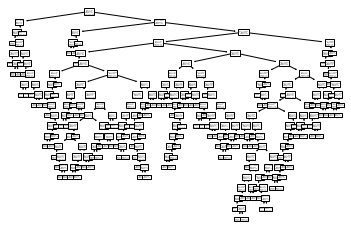

In [175]:
from sklearn import tree
tree.plot_tree(decision_tree)